<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('housing.csv')
data = data.dropna()

In [65]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
scaler = StandardScaler()

In [68]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

Train shape: (16346, 8)
Test shape: (4087, 8)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.106514  0.786208           -1.162062     0.829311        0.929297   
1  -0.024671  0.467873            0.348657    -0.738558       -0.850523   
2   0.758045 -0.711838           -0.287435     0.587350        0.747242   
3   0.633408 -0.735245           -0.048901    -0.122742        0.989183   
4   1.151895 -1.217429           -0.128412    -0.365632       -0.345083   

   population  households  median_income  
0    1.131110    1.040744       0.438412  
1   -0.708899   -0.856152      -0.242389  
2    0.378459    0.691525      -0.108969  
3    1.185124    1.048681      -0.861168  
4   -0.105008   -0.247664      -0.168986  


In [70]:
lin_reg = LinearRegression()

In [71]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [72]:
y_pred = lin_reg.predict(X_test_scaled)

In [73]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [74]:
print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.6400865688993737
RMSE: 70156.12045736385


In [75]:
results = pd.DataFrame({
    "y_test": y_test.values,
    "y_pred": y_pred,
    "error": y_test.values - y_pred
})
print(results.head())
print(y_pred - y_test)

     y_test         y_pred         error
0  245800.0  197058.037522  48741.962478
1  137900.0  157508.790889 -19608.790889
2  218200.0  202099.262704  16100.737296
3  220800.0  173501.822738  47298.177262
4  170500.0  213795.184175 -43295.184175
14416    -48741.962478
16383     19608.790889
7731     -16100.737296
1410     -47298.177262
1335      43295.184175
             ...      
8291    -231450.517105
6274      13257.431203
2997      30898.675388
13440     27768.780778
14797     32663.599624
Name: median_house_value, Length: 4087, dtype: float64


In [76]:
train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, X_train_scaled, y_train, cv=5,
    scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

In [77]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

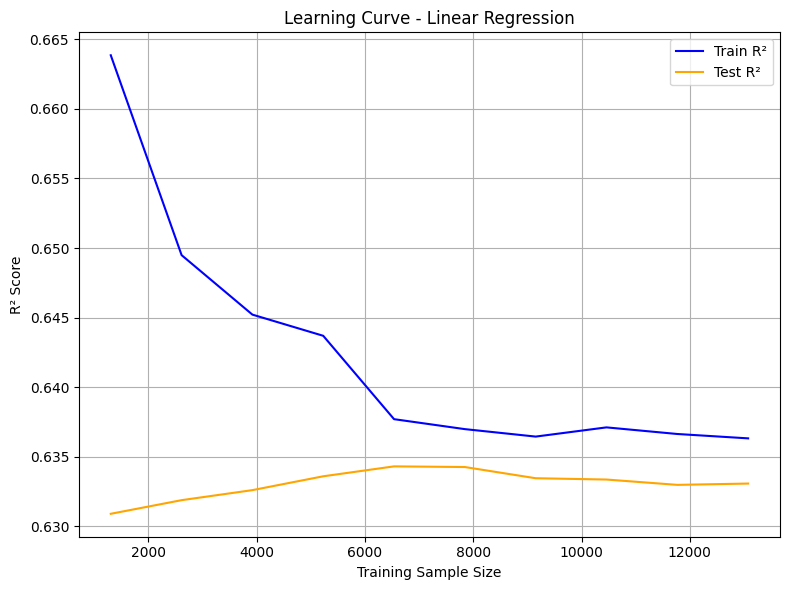

In [78]:
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Train R²', color='blue')
plt.plot(train_sizes, test_mean, label='Test R²', color='orange')
plt.xlabel('Training Sample Size')
plt.ylabel('R² Score')
plt.title('Learning Curve - Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

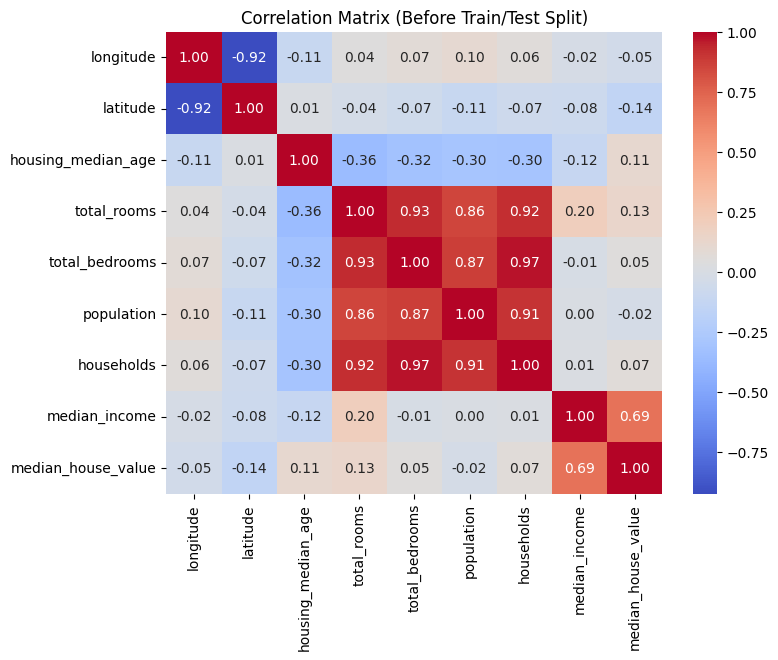

Polynomial Regression Results:
R² Score: 0.6507
RMSE: 67657.12
     y_test         y_pred          error
0   47700.0  103280.114351  -55580.114351
1   45800.0  136486.706844  -90686.706844
2  500001.0  295363.592246  204637.407754
3  218600.0  280601.619101  -62001.619101
4  278000.0  315586.470065  -37586.470065


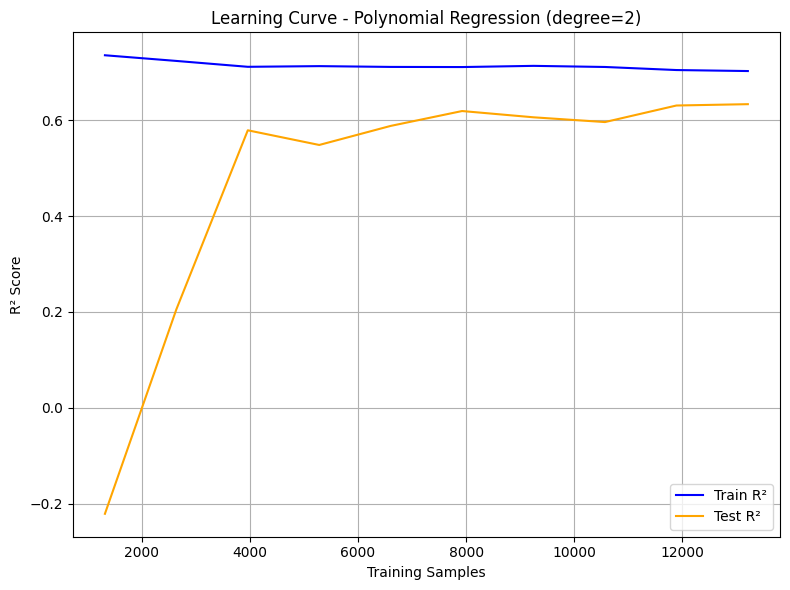

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("housing.csv")

data = data.fillna(data.mean())

corr_matrix = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Before Train/Test Split)")
plt.show()

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_scaled, y_train)

y_pred_poly = poly_reg.predict(X_test_poly_scaled)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Regression Results:")
print(f"R² Score: {r2_poly:.4f}")
print(f"RMSE: {rmse_poly:.2f}")

results_poly = pd.DataFrame({
    "y_test": y_test.values,
    "y_pred": y_pred_poly,
    "error": y_test.values - y_pred_poly
})
print(results_poly.head())

train_sizes, train_scores, test_scores = learning_curve(
    poly_reg, X_train_poly_scaled, y_train,
    scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Train R²", color='blue')
plt.plot(train_sizes, test_mean, label="Test R²", color='orange')
plt.xlabel("Training Samples")
plt.ylabel("R² Score")
plt.title("Learning Curve - Polynomial Regression (degree=2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv("housing.csv")
data = data.fillna(data.mean())

In [82]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
sgd_reg = SGDRegressor(
    max_iter=100,
    verbose=10,
    learning_rate='adaptive',
    random_state=42
)

In [86]:
sgd_reg.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 151905.74, NNZs: 8, Bias: 204357.485663, T: 16512, Avg. loss: 2792618042.768989
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 164430.45, NNZs: 8, Bias: 212050.138891, T: 33024, Avg. loss: 2846795334.549408
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 158688.31, NNZs: 8, Bias: 196468.877705, T: 49536, Avg. loss: 2603070337.992112
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 165329.46, NNZs: 8, Bias: 206928.167121, T: 66048, Avg. loss: 2854096201.712799
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 171761.53, NNZs: 8, Bias: 207742.567066, T: 82560, Avg. loss: 2718093109.484469
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 156089.86, NNZs: 8, Bias: 202665.039168, T: 99072, Avg. loss: 2710396284.516706
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 160949.27, NNZs: 8, Bias: 208581.706365, T: 115584, Avg. loss: 4772097696.786648
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 163567.52, NNZs: 8, Bias: 199125.082286, T: 132096, Avg. l

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='adaptive', max_iter=100, random_state=42,
             verbose=10)

In [87]:
y_pred_init = sgd_reg.predict(X_test_scaled)
r2_init = metrics.r2_score(y_test, y_pred_init)
rmse_init = np.sqrt(metrics.mean_squared_error(y_test, y_pred_init))

In [88]:
print("Initial SGDRegressor Results:")
print(f"R² Score: {r2_init:.4f}")
print(f"RMSE: {rmse_init:.2f}")

Initial SGDRegressor Results:
R² Score: 0.6144
RMSE: 71079.59


In [89]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]
}

In [90]:
grid_search = GridSearchCV(
    estimator=SGDRegressor(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)


In [91]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='r2', verbose=2)

In [92]:
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)


Best parameters found by GridSearchCV:
{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'adaptive', 'penalty': 'l2'}


In [93]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

r2_best = metrics.r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(metrics.mean_squared_error(y_test, y_pred_best))

In [94]:
print("\nBest SGDRegressor test results:")
print(f"R² Score: {r2_best:.4f}")
print(f"RMSE: {rmse_best:.2f}")


Best SGDRegressor test results:
R² Score: 0.6152
RMSE: 71014.14


In [95]:
errors_df = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': y_pred_best,
    'error': y_test.values - y_pred_best
})
print(errors_df.head())

     y_test         y_pred          error
0   47700.0   75536.269850  -27836.269850
1   45800.0  166584.008206 -120784.008206
2  500001.0  266841.175721  233159.824279
3  218600.0  275114.214273  -56514.214273
4  278000.0  277588.800914     411.199086


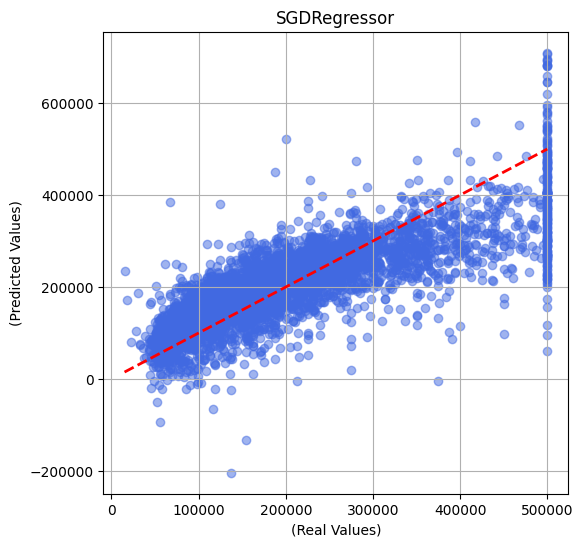

In [96]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, color='royalblue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red', linewidth=2)
plt.xlabel("(Real Values)")
plt.ylabel("(Predicted Values)")
plt.title("SGDRegressor")
plt.grid(True)
plt.show()

In [97]:
print(f"R²={r2_init:.3f}.")
print(f"R²={r2_best:.3f}  RMSE={rmse_best:.0f}")

R²=0.614.
R²=0.615  RMSE=71014
